# **Fashion_Boutique_Dataset**

## step:1 Data Cleaning


In [2]:
import pandas as pd
import numpy as np

# --- 1. Load the Data ---
# We are loading the raw sales data to begin the audit process.
file_path = 'fashion_boutique_dataset.csv'
df = pd.read_csv(file_path)

print("Data Loaded Successfully!")
print(f"Initial Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

# --- 2. Data Cleaning  ---

# A. Standardization: Convert Date strings to actual DateTime objects
# This allows us to analyze trends by Month or Year later.
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# B. Handling Missing Data (Business Logic)
# Instead of deleting rows with missing 'size', we label them as 'Unknown'.
# This preserves the revenue data associated with those sales.
df['size'] = df['size'].fillna('Unknown')

# C. Deduplication
# Removing accidental double-entries to ensure financial accuracy.
initial_rows = len(df)
df.drop_duplicates(inplace=True)
cleaned_rows = len(df)
print(f" Removed {initial_rows - cleaned_rows} duplicate rows.")

# --- 3. Feature Engineering (Creating New Metrics) ---

# Calculating 'Discount Amount' to see how much money we gave away.
df['discount_amount'] = df['original_price'] - df['current_price']

# Extracting 'Month' and 'Year' for the Dashboard
df['sales_month'] = df['purchase_date'].dt.month_name()
df['sales_year'] = df['purchase_date'].dt.year

# --- 4. Final Audit ---
print("\n Data Quality Check:")
print(df.info())

print("\n First 5 Rows of Clean Data:")
display(df.head())

# --- 5. Export ---
# Save the clean file to use in SQL or PowerBI later
df.to_csv('Cleaned_Fashion_Data.csv', index=False)
print("\n 'Cleaned_Fashion_Data.csv' has been saved! Refresh your file browser to see it.")

Data Loaded Successfully!
Initial Dataset Shape: 2176 rows, 14 columns
 Removed 0 duplicate rows.

 Data Quality Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product_id           2176 non-null   object        
 1   category             2176 non-null   object        
 2   brand                2176 non-null   object        
 3   season               2176 non-null   object        
 4   size                 2176 non-null   object        
 5   color                2176 non-null   object        
 6   original_price       2176 non-null   float64       
 7   markdown_percentage  2176 non-null   float64       
 8   current_price        2176 non-null   float64       
 9   purchase_date        2176 non-null   datetime64[ns]
 10  stock_quantity       2176 non-null   int64         
 11  customer_rating      1814 n

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason,discount_amount,sales_month,sales_year
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN,0.0,July,2025
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN,0.0,August,2025
2,FB000003,Accessories,Uniqlo,Winter,Unknown,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN,0.0,August,2025
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN,0.0,July,2025
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN,0.0,August,2025



 'Cleaned_Fashion_Data.csv' has been saved! Refresh your file browser to see it.


# **Bar Chart**

/tmp/ipython-input-4142833737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brands, y=revenue_lost, palette='Reds_r')


✅ Chart Saved! Download 'Returns_Analysis_Chart.png' from the folder.


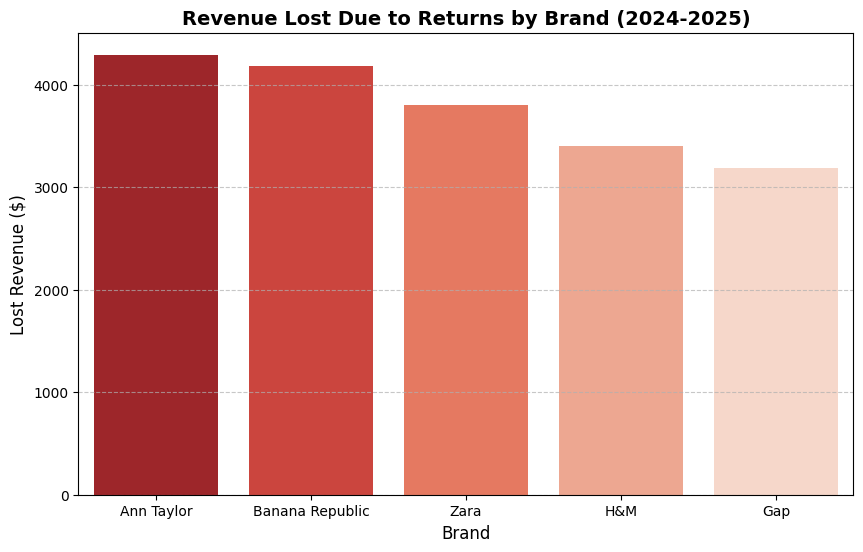

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data from your SQL Query
brands = ['Ann Taylor', 'Banana Republic', 'Zara', 'H&M', 'Gap']
revenue_lost = [4293.41, 4179.34, 3806.19, 3401.69, 3184.04]

# Create the Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=brands, y=revenue_lost, palette='Reds_r')

# Professional Formatting
plt.title('Revenue Lost Due to Returns by Brand (2024-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Lost Revenue ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save it
plt.savefig('Returns_Analysis_Chart.png', dpi=300)
print("✅ Chart Saved! Download 'Returns_Analysis_Chart.png' from the folder.")
plt.show()

✅ Dashboard Generated Successfully!


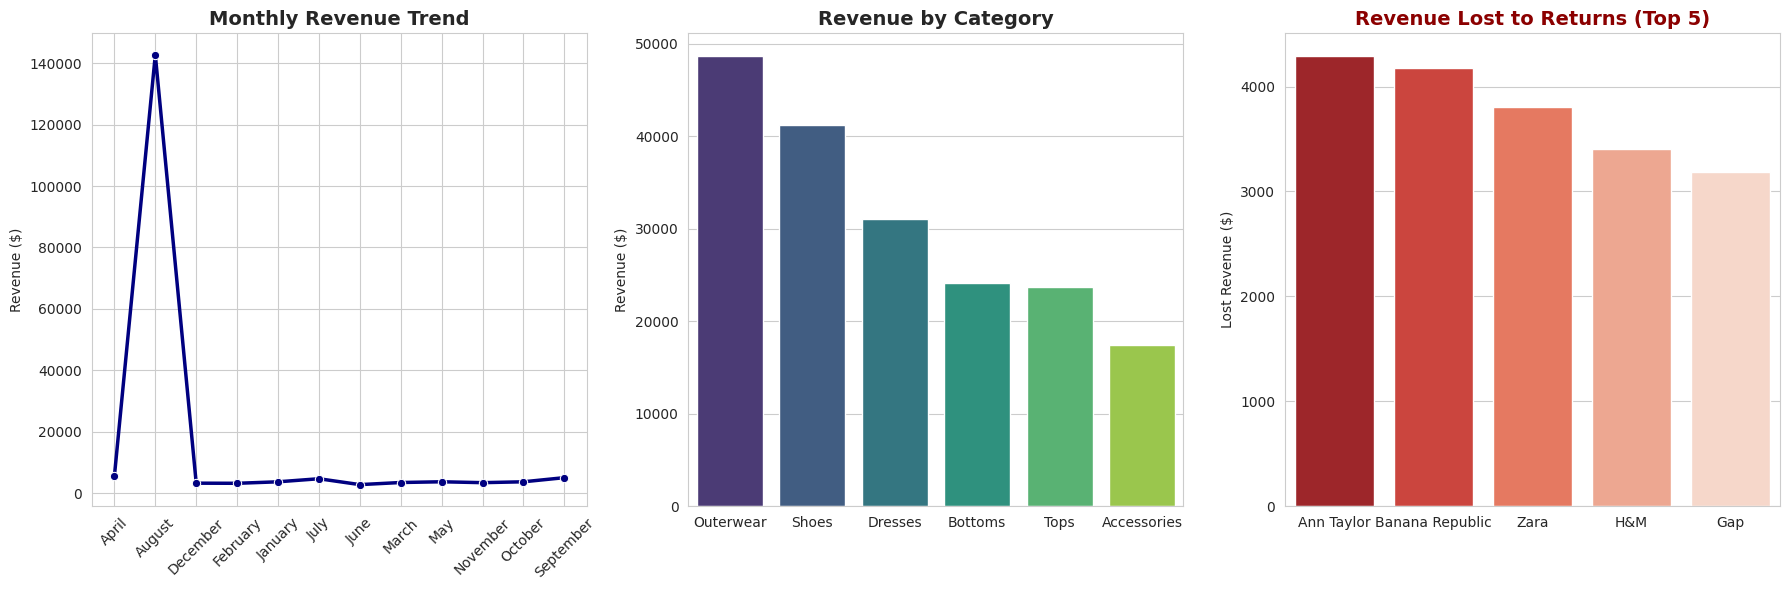

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# --- 1. CLEANUP CONFIGURATION ---
# Ignore warnings to keep the output clean
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('Cleaned_Fashion_Data.csv')

# Setup the Dashboard
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")

# --- CHART 1: Monthly Sales Trend ---
plt.subplot(1, 3, 1)
monthly_sales = df.groupby('sales_month')['current_price'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='sales_month', y='current_price', marker='o', color='navy', linewidth=2.5)
plt.title('Monthly Revenue Trend', fontsize=14, fontweight='bold') # Removed emoji
plt.xticks(rotation=45)
plt.ylabel('Revenue ($)')
plt.xlabel('')

# --- CHART 2: Best Selling Categories ---
plt.subplot(1, 3, 2)
cat_sales = df.groupby('category')['current_price'].sum().sort_values(ascending=False).reset_index()
# FIX: Assigned x to hue and set legend=False to fix FutureWarning
sns.barplot(data=cat_sales, x='category', y='current_price', hue='category', palette='viridis', legend=False)
plt.title('Revenue by Category', fontsize=14, fontweight='bold') # Removed emoji
plt.ylabel('Revenue ($)')
plt.xlabel('')

# --- CHART 3: Returns by Brand ---
plt.subplot(1, 3, 3)
returns_df = df[df['is_returned'] == True]
brand_returns = returns_df.groupby('brand')['current_price'].sum().sort_values(ascending=False).head(5).reset_index()
# FIX: Assigned x to hue and set legend=False to fix FutureWarning
sns.barplot(data=brand_returns, x='brand', y='current_price', hue='brand', palette='Reds_r', legend=False)
plt.title('Revenue Lost to Returns (Top 5)', fontsize=14, fontweight='bold', color='darkred') # Removed emoji
plt.ylabel('Lost Revenue ($)')
plt.xlabel('')

# Final Save
plt.tight_layout()
plt.savefig('Executive_Dashboard.png', dpi=300)
print("✅ Dashboard Generated Successfully!")
plt.show()